# Logistic Regression

## Setup

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sys
import os
import seaborn as sns
from scipy.special import logit

from sklearn import preprocessing

from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# The following lets us import cleanup.py 
# Specifically it adds SF295_G007 to the python system path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from cleanup import removeRows

In [22]:
data_processor = removeRows("../project_train.csv")
data_processor.process_rows()
data = data_processor.df
data


Row 85 will be removed:
danceability          0.7050
energy              734.0000
key                   1.0000
loudness             -4.5510
mode                  0.0000
speechiness           0.0775
acousticness          0.2850
instrumentalness      0.0000
liveness              0.0480
valence               0.9630
tempo               157.9920
Label                 1.0000
Name: 84, dtype: float64

Row 95 will be removed:
danceability          0.276000
energy                0.715000
key                   0.000000
loudness             -5.356000
mode                  1.000000
speechiness           0.043200
acousticness          0.005520
instrumentalness      0.000417
liveness              0.201000
valence               0.173000
tempo               137.028000
Label                 1.000000
Name: 95, dtype: float64


danceability  energy  key  loudness  mode  speechiness  acousticness  \
0           0.545   0.884    5    -4.807     0       0.3670      0.290000   
1           0.795   0.545    7    -8.153     1       0.3430      0.003960   
2           0.489   0.871    5    -5.825     1       0.3860      0.002850   
3           0.539   0.931    4    -1.803     0       0.2620      0.000713   
4           0.918   0.734   11    -2.832     0       0.2690      0.029400   
..            ...     ...  ...       ...   ...          ...           ...   
498         0.897   0.612   11   -10.489     1       0.2110      0.029700   
499         0.728   0.454    0    -9.281     1       0.0278      0.512000   
500         0.571   0.837    0    -5.604     1       0.0377      0.165000   
501         0.582   0.720   10    -9.722     0       0.2310      0.012700   
502         0.697   0.474    9    -6.663     1       0.0351      0.603000   

     instrumentalness  liveness  valence    tempo  Label  
0            0.000000    0.3700    0.641   86.049      1  
1            0.000000    0.2730    0.809   91.967      1  
2            0.000004    0.1300    0.341  117.431      1  
3            0.000000    0.2040    0.685   85.571      0  
4            0.000008    0.1910    0.608   97.044      1  
..                ...       ...      ...      ...    ...  
498          0.186000    0.0894    0.767  102.305      1  
499          0.000001    0.0831    0.323  130.368      0  
500          0.000005    0.1700    0.713  141.660      1  
501          0.035300    0.3630    0.541   89.273      1  
502          0.000000    0.1100    0.249  127.904      0  

[503 rows x 12 columns]

## Data Visualization

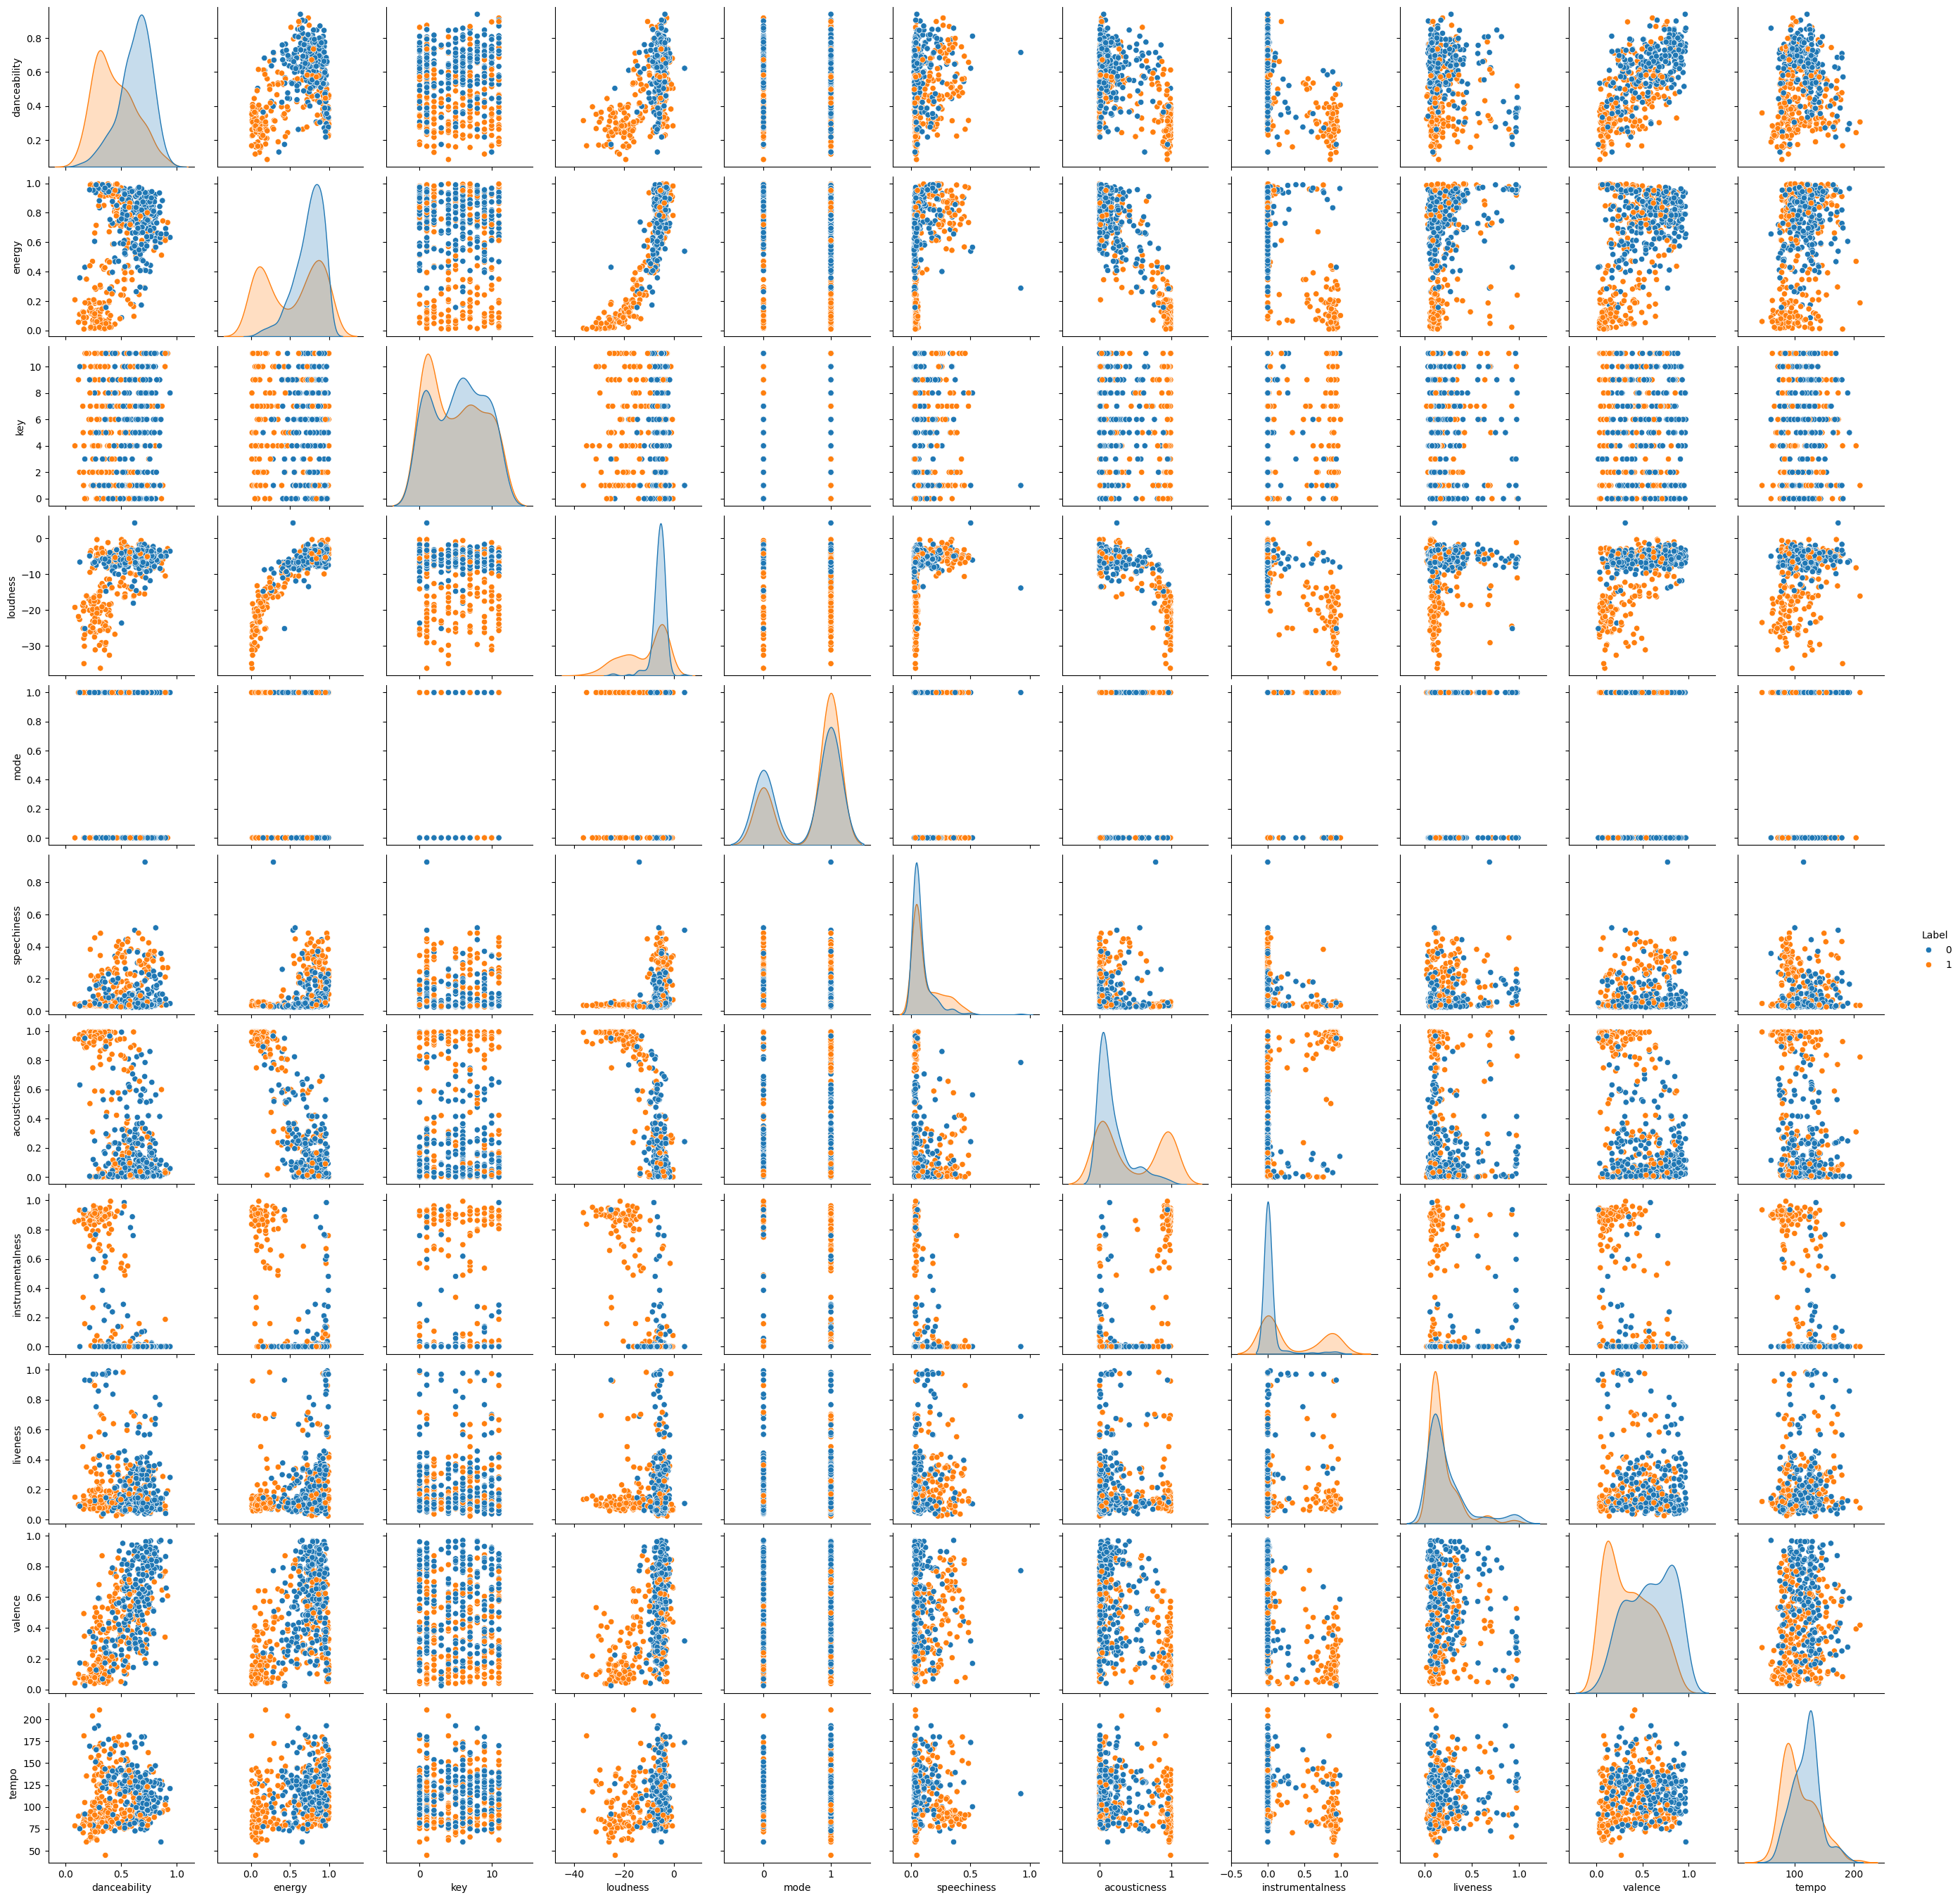

In [23]:
sns.pairplot(data, hue = "Label")

In [45]:
vars_to_transform = [
    "danceability",
    "energy",
    "speechiness",
    "acousticness",
    "liveness",
    "valence",
]
data[data[vars_to_transform].eq(0).any(axis=1)]

Empty DataFrame
Columns: [danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, Label]
Index: []

In [46]:

transformed_data = data.copy()
transformed_data[vars_to_transform] = transformed_data[vars_to_transform].transform(logit)

0      -4.807
1      -8.153
2      -5.825
3      -1.803
4      -2.832
        ...  
498   -10.489
499    -9.281
500    -5.604
501    -9.722
502    -6.663
Name: loudness, Length: 503, dtype: float64

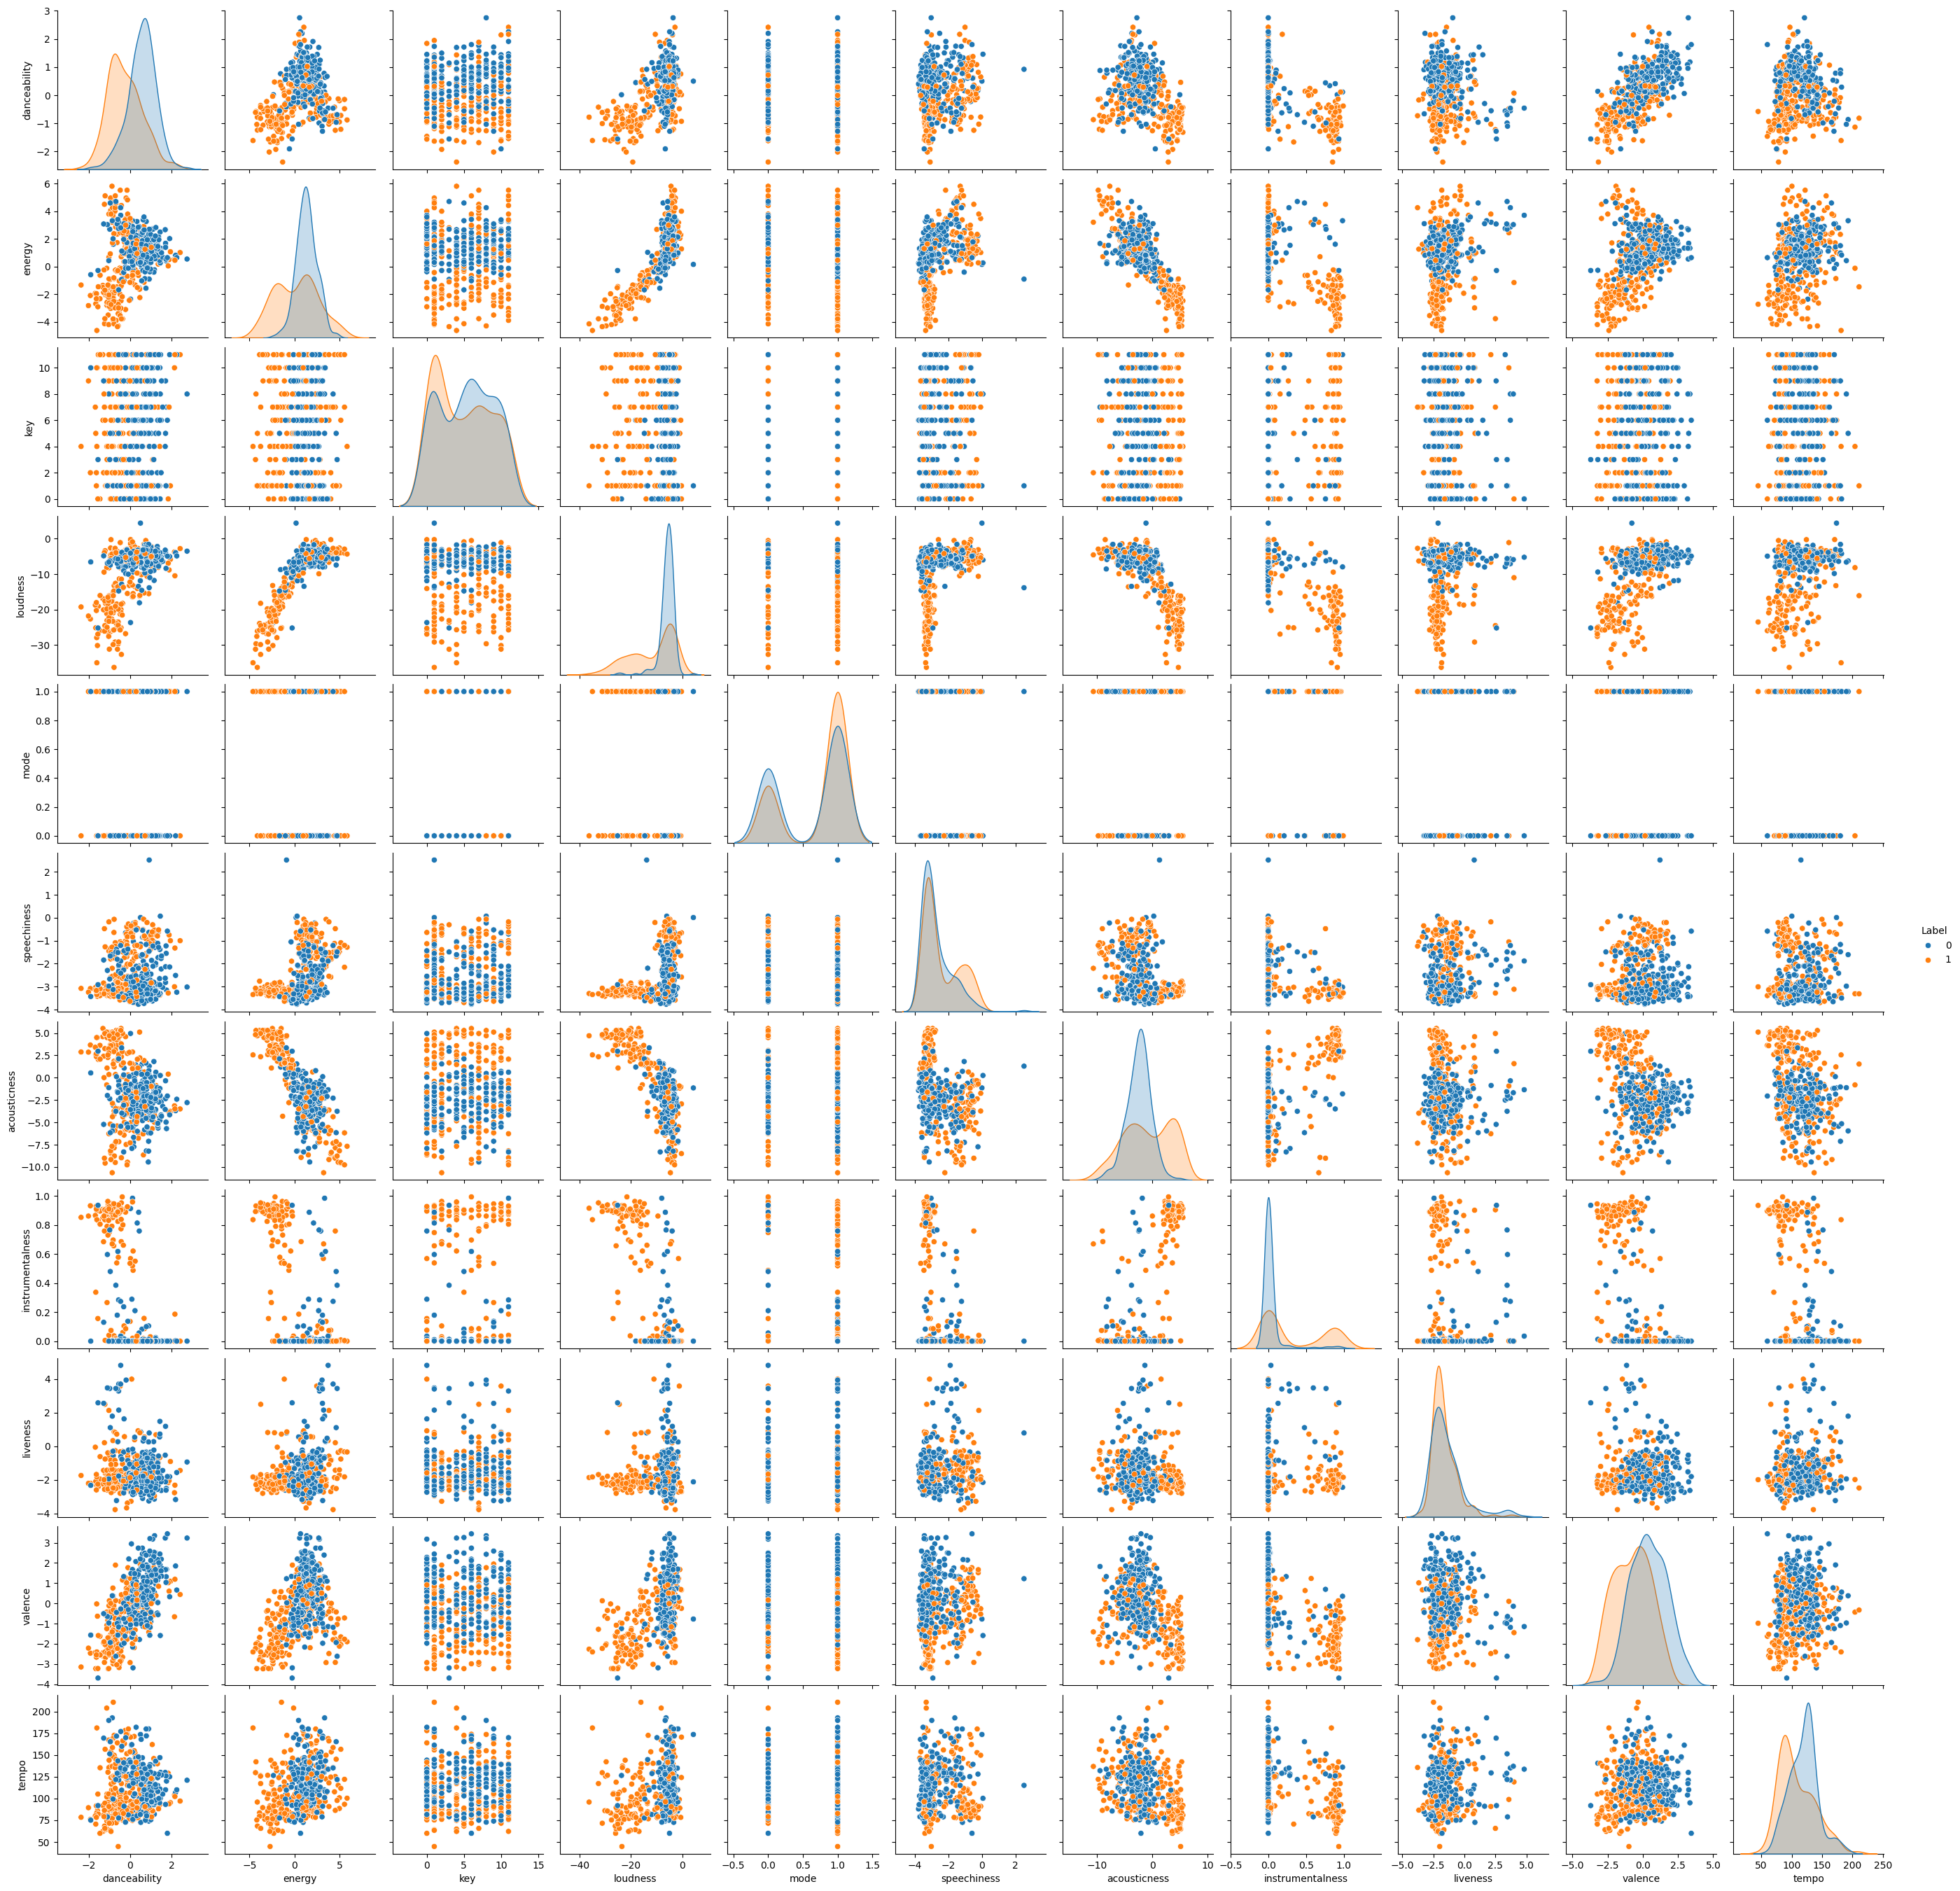

In [47]:
sns.pairplot(transformed_data, hue = "Label")

## Model With only logit-Transformed Predictors

In [48]:
X = transformed_data[vars_to_transform]

## Basic Model

In [27]:
all_predictors = data.drop("Label", axis=1)
response = data["Label"]

In [28]:
encoded_data = pd.get_dummies(all_predictors, columns=["key", "mode"])

In [29]:
encoded_data

danceability  energy  loudness  speechiness  acousticness  \
0           0.545   0.884    -4.807       0.3670      0.290000   
1           0.795   0.545    -8.153       0.3430      0.003960   
2           0.489   0.871    -5.825       0.3860      0.002850   
3           0.539   0.931    -1.803       0.2620      0.000713   
4           0.918   0.734    -2.832       0.2690      0.029400   
..            ...     ...       ...          ...           ...   
498         0.897   0.612   -10.489       0.2110      0.029700   
499         0.728   0.454    -9.281       0.0278      0.512000   
500         0.571   0.837    -5.604       0.0377      0.165000   
501         0.582   0.720    -9.722       0.2310      0.012700   
502         0.697   0.474    -6.663       0.0351      0.603000   

     instrumentalness  liveness  valence    tempo  key_0  ...  key_4  key_5  \
0            0.000000    0.3700    0.641   86.049  False  ...  False   True   
1            0.000000    0.2730    0.809   91.967  False  ...  False  False   
2            0.000004    0.1300    0.341  117.431  False  ...  False   True   
3            0.000000    0.2040    0.685   85.571  False  ...   True  False   
4            0.000008    0.1910    0.608   97.044  False  ...  False  False   
..                ...       ...      ...      ...    ...  ...    ...    ...   
498          0.186000    0.0894    0.767  102.305  False  ...  False  False   
499          0.000001    0.0831    0.323  130.368   True  ...  False  False   
500          0.000005    0.1700    0.713  141.660   True  ...  False  False   
501          0.035300    0.3630    0.541   89.273  False  ...  False  False   
502          0.000000    0.1100    0.249  127.904  False  ...  False  False   

     key_6  key_7  key_8  key_9  key_10  key_11  mode_0  mode_1  
0    False  False  False  False   False   False    True   False  
1    False   True  False  False   False   False   False    True  
2    False  False  False  False   False   False   False    True  
3    False  False  False  False   False   False    True   False  
4    False  False  False  False   False    True    True   False  
..     ...    ...    ...    ...     ...     ...     ...     ...  
498  False  False  False  False   False    True   False    True  
499  False  False  False  False   False   False   False    True  
500  False  False  False  False   False   False   False    True  
501  False  False  False  False    True   False    True   False  
502  False  False  False   True   False   False   False    True  

[503 rows x 23 columns]

In [30]:
encoded_data_train, encoded_data_test, response_train, response_test = train_test_split(encoded_data, response, test_size=0.2)

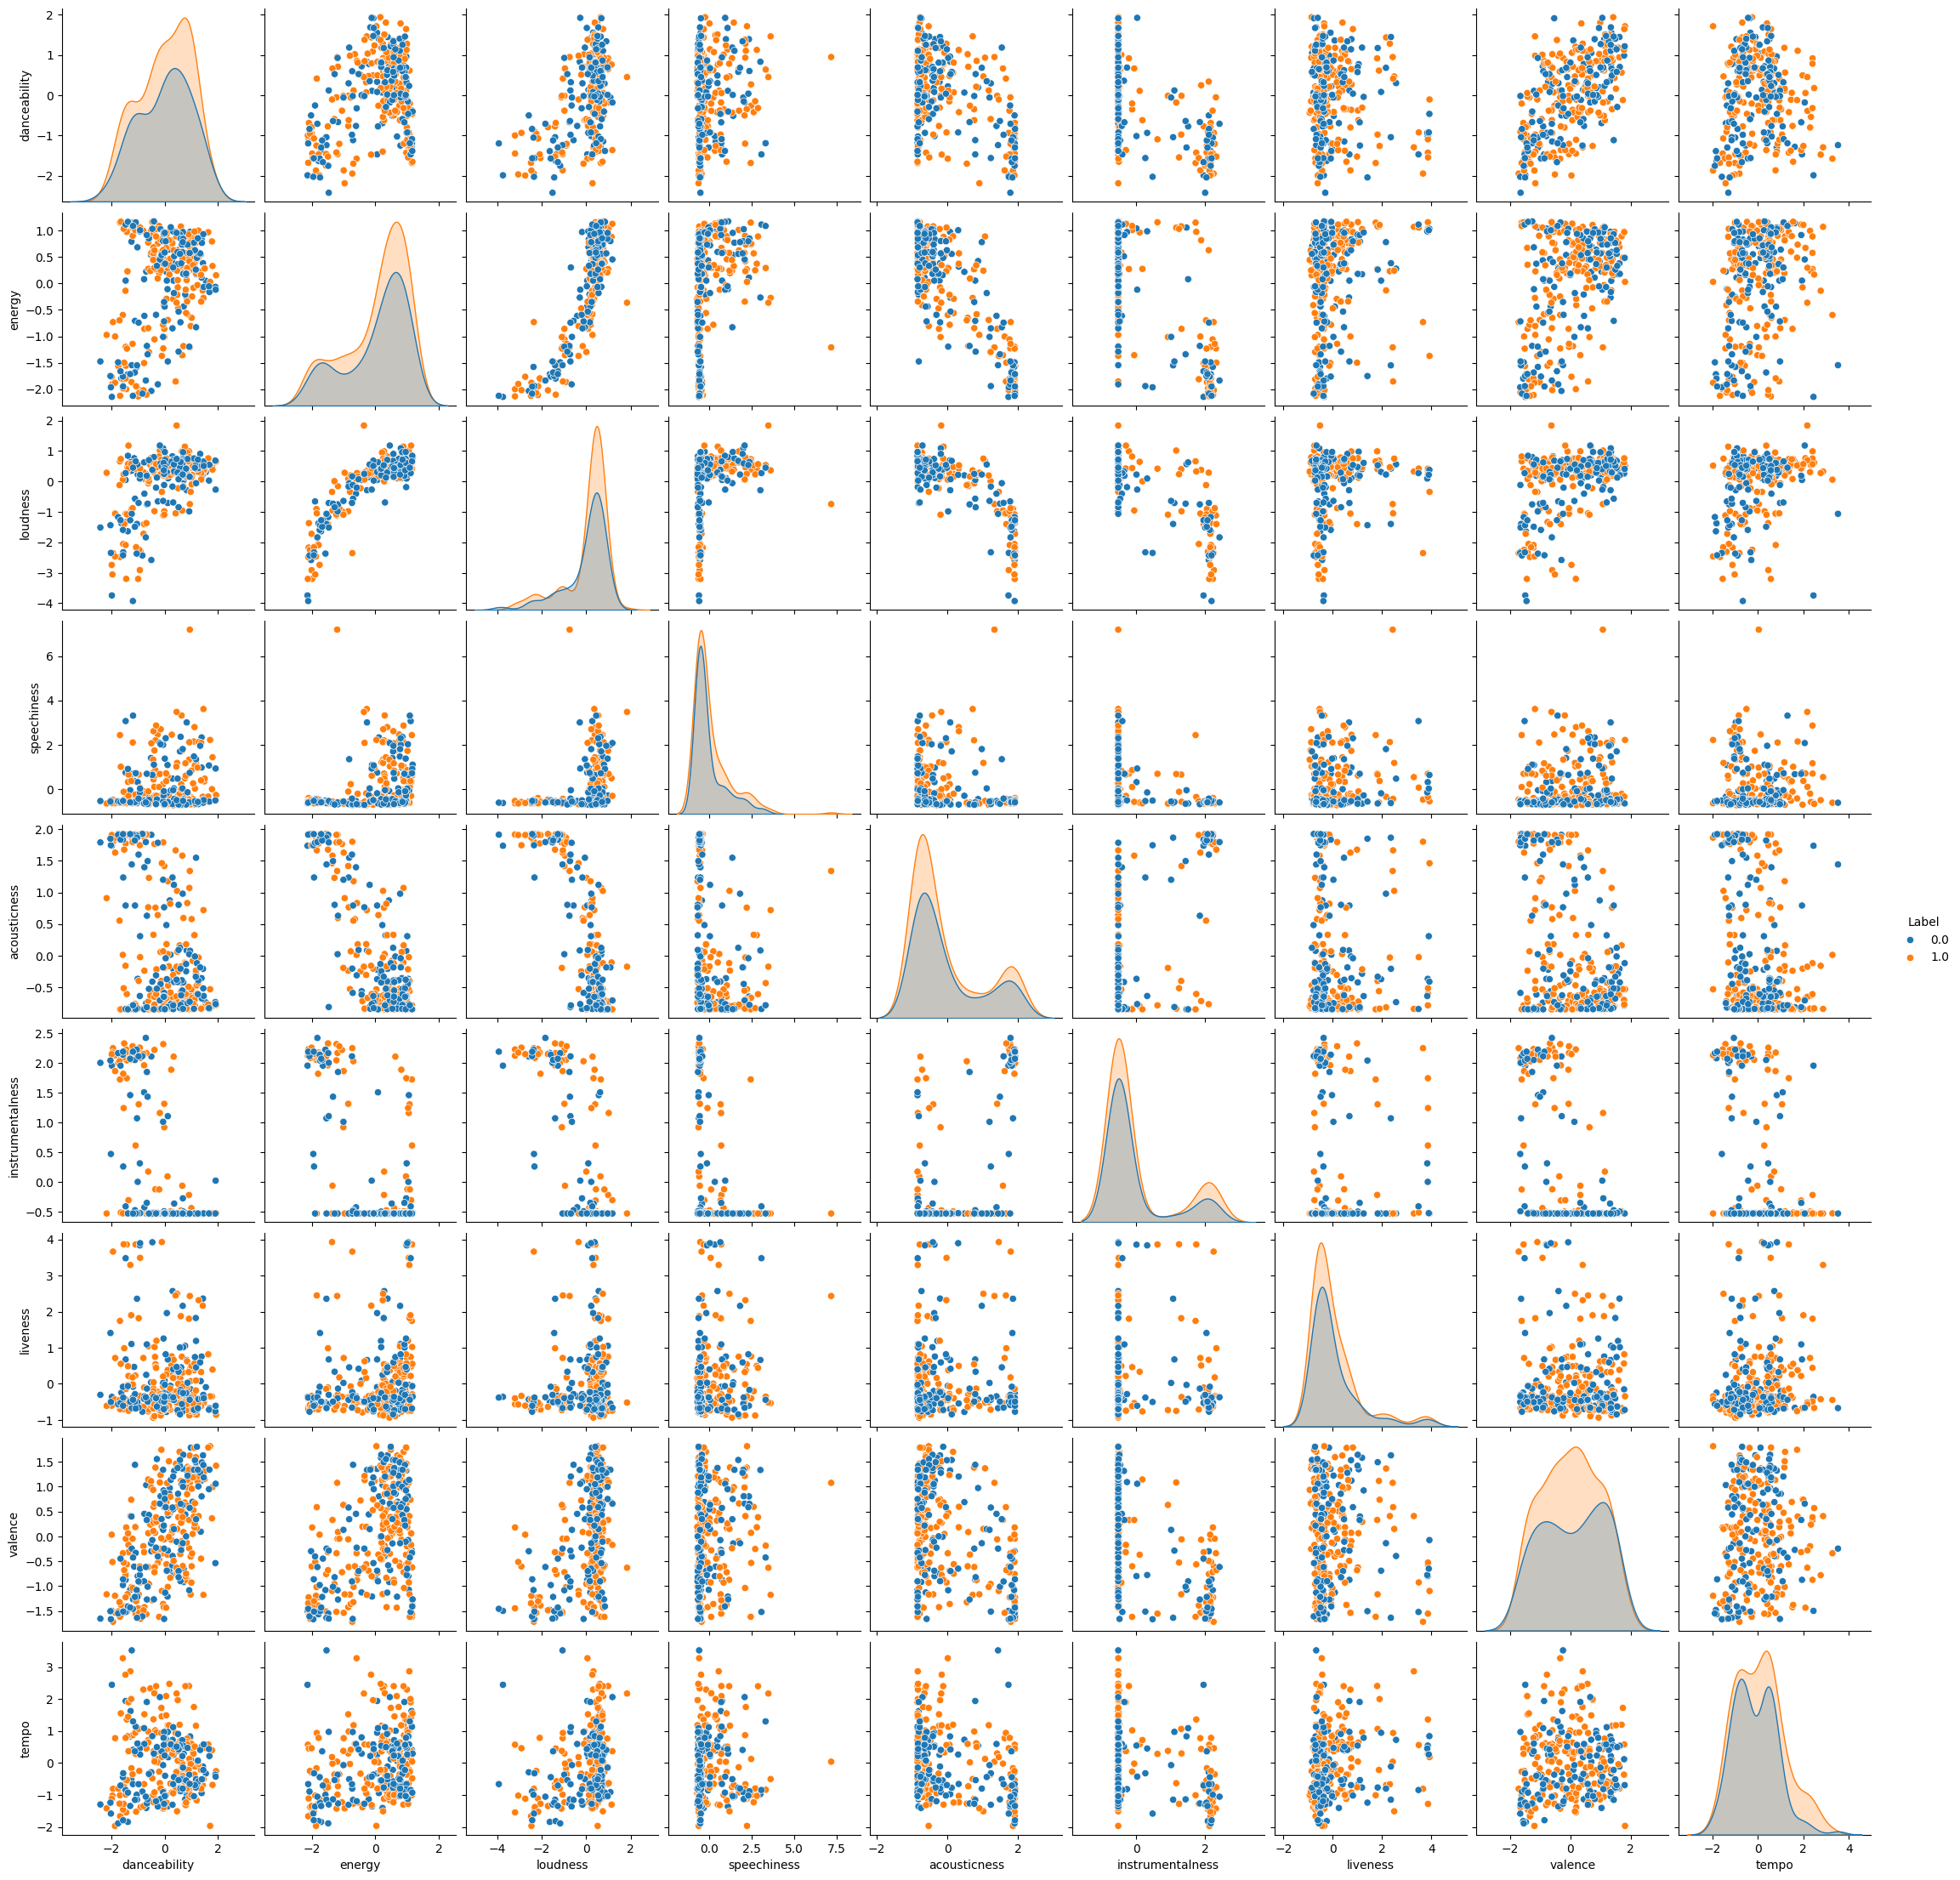

In [31]:
variables_to_trainsform = [""]
sns.pairplot(pd.DataFrame(data = scaled_encoded_training_data, columns = encoded_data_train.columns).drop([*(["key_{}".format(i) for i in range(12)] + ["mode_0", "mode_1"])], axis=1).join(response_train), hue="Label")

In [32]:
full_model = LogisticRegression()
full_model.fit(encoded_data_train, response_train)

c:\Users\toven\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()